## 1.  Yifan's method
Find similar words through modeling training on Word2Vec

In [1]:
from Data_Processor import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from collections import Counter

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hwk97\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hwk97\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hwk97\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from gensim.test.utils import datapath
from gensim import utils

In [3]:
model = gensim.models.Word2Vec.load('D')

In [4]:
for item, prob in model.wv.most_similar(['user','customer','service'], topn=30):
    print(item, prob)

apps 0.5752025246620178
cust 0.5691397190093994
automated 0.5496034622192383
client 0.5471370220184326
convenience 0.5385664701461792
seamless 0.5369963049888611
merchant 0.5285861492156982
functionality 0.5226467847824097
continuously 0.5213117599487305
provider 0.5177848935127258
online 0.5137568712234497
capability 0.5116159319877625
personalized 0.5113574862480164
method 0.5082338452339172
interface 0.4984561502933502
vendor 0.49747660756111145
device 0.496929794549942
transaction 0.4869909882545471
interaction 0.4842202365398407
zelle 0.48402607440948486
personalised 0.4822697043418884
process 0.47558674216270447
ui 0.47495782375335693
app 0.4743165671825409
frictionless 0.47399845719337463
bofahelp 0.4709188938140869
messaging 0.47006237506866455
portal 0.46815064549446106
subscription 0.4664432406425476
costumer 0.46493059396743774


## 2.  Ruofan's method
Find similar words through visualization and manually check

In [5]:
dirlist=["../SentistrengthData/Morgan_Stanley_Weekly/Morgan_Stanley"]
DP=Data_Processor(start_month='2017-06',end_month='2020-05',
                  template=dirlist)
DP.readdata()
print(DP.datanums())
DP.specifylang()
noise=DP.removenoise() 
DP.clean()
print(DP.datanums())


([4577, 4968, 4675, 4893, 4178, 5011, 5379, 5127, 3961, 3999, 3606, 5131, 4841, 4097, 3976, 5675, 4350, 3863, 3630, 3471, 3542, 4300, 3988, 5320, 3799, 3265, 3160, 3566, 3455, 3431, 3081, 3417, 3829, 4732, 4458, 4505], 151256)
([4570, 4964, 4673, 4888, 4176, 5006, 5374, 5126, 3959, 3994, 3603, 5129, 4839, 4095, 3973, 5671, 4345, 3860, 3627, 3466, 3541, 4300, 3987, 5315, 3795, 3263, 3160, 3562, 3453, 3429, 3078, 3414, 3825, 4729, 4456, 4504], 151149)


Copy another DPt as tokenized data -> good for later network analysis (remove stop words)

In [6]:
#DP is not tokenized, choose another DPt as tokenized data for later network analysis
DPt = Data_Processor(start_month='2017-06',end_month='2020-05',
                     template=dirlist)
DPt.readdata()
DPt.specifylang()
noise = DPt.removenoise() 
DPt.clean()
#DPt.addstopwords(['morganstanley','bank','say','year','sachs','could','would','go','know'])
DPt.tokenizetext()

In [7]:
all_months = DP.dlist

#analyze the sentiment & freq of tweets containing the filtered words with at least #count times
def subanalyze_sentiment(all_data, keywords, count=1): # data hierarchy: months*(text,score)*piece
    positivity = []
    negativity = []
    freq = []
    for month_data in all_data:
        pos, neg, num = 0,0,0
        
        for item in month_data:
            if sum([int(k.lower() in item['text'].lower()) for k in keywords])>=count:
                pos += item['positive']
                neg += item['negative']
                num += 1  #save number of tweets containing the filtered words with at least #count times
        
        positivity.append(pos/max(1,num))
        negativity.append(neg/max(1,num))
        freq.append(num)
        
    return positivity, negativity, freq

#show two (pos/neg) sentiments of tweets containing the filtered words with at least #count times
def double_sentiment(data, keyword_list, count=1):
    app = subanalyze_sentiment(data, keyword_list, count)
    matplotlib.rcParams['figure.dpi'] = 100
    fig, ax1 = plt.subplots(figsize = (7,4))
    ax1.plot(np.array(all_months),app[0],color='C1')
    ax1.set_xticks(np.arange(36))
    ax1.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(all_months)], rotation=45)
    ax1.set_ylabel('Positive')
    for t in ax1.xaxis.get_ticklines():
        t.set_visible(False)
    for t in ax1.xaxis.get_ticklines()[::2][::3]:
        t.set_visible(True)
    ax2 = ax1.twinx()
    for t in ax2.xaxis.get_ticklines():
        t.set_visible(False)
    for t in ax2.xaxis.get_ticklines()[::2][::3]:
        t.set_visible(True)
    ax2.set_xticks(np.arange(36))
    ax2.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(all_months)], rotation=45)
    ax2.plot(all_months,app[1],color='C2')
    ax2.set_ylabel('Negative')
    ax1.set_title('Keywords: '+', '.join(keyword_list[:3]))
    plt.show()

    
#show one company's sentiments/frequency trend of the tweets containing the filtered keywords with at least #count times    
def trend_analysis(data, polarity, keyword_list, count=1): #count=1 means take 1 words appearing
    #polarity=0 for pos, 1 for neg
    app = subanalyze_sentiment(data, keyword_list, count)
    matplotlib.rcParams['figure.dpi'] = 100
    fig, ax1 = plt.subplots(figsize = (7,4))
    ax1.plot(np.array(all_months), app[polarity], color = 'C'+str(polarity+1))
    ax1.set_xticks(np.arange(36))
    ax1.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(all_months)], rotation=45)
    ax1.set_ylabel('Sentiment Polarity')
    for t in ax1.xaxis.get_ticklines():
        t.set_visible(False)
    for t in ax1.xaxis.get_ticklines()[::2][::3]:
        t.set_visible(True)
    ax2 = ax1.twinx()
    for t in ax2.xaxis.get_ticklines():
        t.set_visible(False)
    for t in ax2.xaxis.get_ticklines()[::2][::3]:
        t.set_visible(True)
    ax2.set_xticks(np.arange(36))
    ax2.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(all_months)],rotation=45)
    ax2.bar(all_months, app[2], alpha=0.3)
    ax2.set_ylabel('Sentiment Frequency')
    extra = '...' if len(keyword_list)>5 else ''
    ax1.set_title('Keywords: '+', '.join(keyword_list[:5])+extra)
    plt.show()
    

#show all four sentiments/frequency trends of the tweets containing the filtered keywords with at least #count times 
def all_trend_analysis(data, polarity, keyword_list, count = 1): 
    app = [subanalyze_sentiment(i,keyword_list, count) for i in data]
    matplotlib.rcParams['figure.dpi'] = 200
    fig, ax = plt.subplots(2, 2, sharex = True, sharey = True, figsize = (12,8))
    for i in range(2):
        for j in range(2):
            temp = 2*i + j      
            ax[i][j].plot(np.array(all_months), app[temp][polarity], color = 'C' + str(polarity+1))
            ax[i][j].set_xticks(np.arange(36))
            ax[i][j].set_xticklabels([i if x%3 == 0 else '' for x,i in enumerate(all_months)], rotation=45)
            if not j:
                ax[i][j].set_ylabel('Sentiment Polarity')
            for t in ax[i][j].xaxis.get_ticklines():
                t.set_visible(False)
            for t in ax[i][j].xaxis.get_ticklines()[::2][::3]:
                t.set_visible(True)
            ax2 = ax[i][j].twinx()
            for t in ax2.xaxis.get_ticklines():
                t.set_visible(False)
            for t in ax2.xaxis.get_ticklines()[::2][::3]:
                t.set_visible(True)
            ax2.set_xticks(np.arange(36))
            ax2.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(all_months)], rotation=45)
            ax2.bar(all_months,app[temp][2],alpha=0.3)
            if j:
                ax2.set_ylabel('Sentiment Frequency')
            ax[i][j].set_title(category[temp])
    
    extra = '...' if len(keyword_list)>5 else ''
    plt.suptitle('Keywords: '+', '.join(keyword_list[:5])+extra)
    plt.show()

#show the twitter texts containing the filtered keywords with at least #count times
def show_tweets(data, month_list, keywords, count = 1, threshold = 2, unique=False):
    result = []
    for m in month_list:
        idx = all_months.index(m)
        for item in data[idx]:
            if sum([int(k in item['text'].lower()) for k in keywords])>=count and (item['positive']>threshold or item['negative']<-threshold):
                result.append((item['text'].strip(), item['positive'], item['negative']))
    
    return sorted(list(set(result)), key=lambda x: x[0]) if unique else sorted(result, key=lambda x: x[0])

### 2.1 Analyze the sentiment / frequency trend

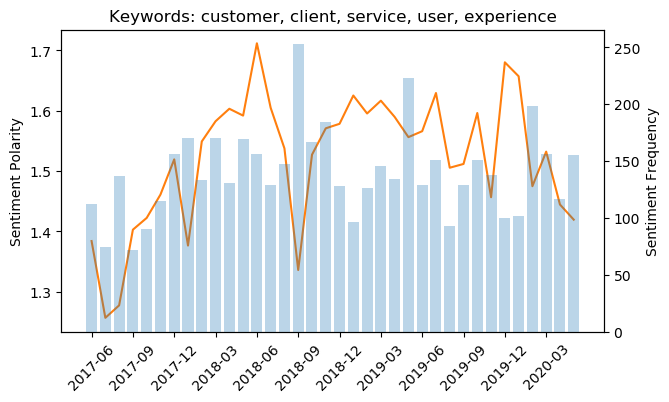

In [8]:
#choose polarity=0 for pos, 1 for neg, count means tweets containing the words with at least #count times
topic_words = ['customer','client','service','user', 'experience']
trend_analysis(DP.data, polarity = 0, 
               keyword_list = topic_words,
               count=1)

**Check for the spikes / slumps in the trend charts above (see reason why)**

In [9]:
month = ['2017-07']  #choose the month here (must be a list)
topic_words = ['customer','client','service','user','experience'] #choose the topic here
tweet_result = show_tweets(DP.data, month_list = month, 
                            keywords = topic_words, 
                            count = 1,
                            threshold = 2, #choose only pos>2 & neg<-2 tweets
                            unique = True)  #choose only the unique tweets


print(f"Total Counts: {len(tweet_result)} \n")
for item in tweet_result:
    print(item[0], item[1], item[2],'\n')

Total Counts: 9 

Chase bank is horrible We moved all our accounts to a local bank who services our community 1 -4 

Inspiring to see NSPCC in MorganStanley helping us reach out to children who experience sexual abuse Here today to talk to staff  3 -4 

Morgan Stanley is a transaction with Wachovia LLC Financial Services Inc and vacant vehicles 1 -4 

Morgan Stanley is selling Robo services Cut out the middle manwoman and they keep all the profits One size does NOT fit all Shame on you 2 -3 

MorganStanley I am deeply disappointed with the services provided by u ppl I had for the miscommunication due to u ppl I am disheartened 1 -3 

Take the company public dump it on your clients and then downgrade it If anyone was fooled that Morgan Stanley cares for their clients  1 -3 

The single most valuable thing that an FA can do is engage with the client says MorganStanley Jeff McMillian  1 -3 

Where are the Secret Services of this Nation No where while the body count grows 1 -3 

well idk a

**Explore each months various (pos,neg) sentiment combinations frequency**

In [10]:
month = '2017-07'
idx = all_months.index(month)
print("positive", "negative", "count")
count = Counter([(item['positive'],item['negative']) for item in DP.data[idx]])
sorted(count.items(),key=lambda x: -x[1])

positive negative count


[((1, -1), 2229),
 ((1, -2), 995),
 ((2, -1), 621),
 ((1, -3), 337),
 ((2, -2), 213),
 ((3, -1), 204),
 ((1, -4), 113),
 ((2, -3), 85),
 ((3, -2), 57),
 ((2, -4), 35),
 ((3, -3), 26),
 ((3, -4), 15),
 ((4, -1), 14),
 ((4, -2), 6),
 ((1, -5), 5),
 ((5, -2), 2),
 ((5, -3), 2),
 ((2, -5), 1),
 ((5, -4), 1),
 ((5, -1), 1),
 ((4, -4), 1),
 ((4, -3), 1)]

### 2.2 Extract topic twitter texts
Explore specifc topics and the texts that include them (with at least # count of words)

In [11]:
#choose all months now
topic_words = ['client', 'service']
tweet_result = show_tweets(DP.data, month_list = all_months, 
                            keywords = topic_words, 
                            count = 2,
                            threshold = 3, #choose only pos>threshold & neg<-threshold tweets
                            unique = True)  #choose only the unique tweets


print(f"Total Counts: {len(tweet_result)} \n")
for item in tweet_result:
    print(item[0], item[1], item[2],'\n')

Total Counts: 5 

Celebrating our stars Morgan Stanley recognizes our service professionals for putting our clients needs first  4 -1 

Congrats to MorganStanley for achieving JD Power certification for excellent customer service for phone support in their client service center Second year in a row for their Cash Management and Digital business line and a first award for Global Stock Plan Services  4 -1 

I am very pleased to announce that I have been named to Morgan Stanleys prestigious Chairmans Club an elite group composed of the firms successful Financial Advisors This accolade recognizes consistent excellence in providing a wide range of services to clients 1 -5 

Thank you Global Atlantic Financial Group for sponsoring my keynote presentations at the Morgan Stanley conference Its such a thrill working with two powerhouse organizations committed to providing exceptional products and service to advisors and clients across the nation  4 -1 

We are thrilled to announce Madhu Ghosh H

In [12]:
#choose all months now
topic_words = ['app ','user','client', 'digital', 'experience']
tweet_result = show_tweets(DP.data, month_list = all_months, 
                            keywords = topic_words, 
                            count = 2,
                            threshold = 3, #choose only pos>threshold & neg<-threshold tweets
                            unique = True)  #choose only the unique tweets


print(f"Total Counts: {len(tweet_result)} \n")
for item in tweet_result:
    print(item[0], item[1], item[2],'\n')

Total Counts: 6 

Back from last weeks terrific Team Transformation Summit ready to share with clients Cant believe all the new digital features and safety measures that the firm is rolling out Proud to work for an industry leader  4 -1 

Congrats to MorganStanley for achieving JD Power certification for excellent customer service for phone support in their client service center Second year in a row for their Cash Management and Digital business line and a first award for Global Stock Plan Services  4 -1 

Excellent digital vision Deliver at the speed of our Clients  4 -1 

Ill never forget the time when I used to work at Morgan Stanley and one of my clients invited me to lunch at a local Chinese restaurant I walked in to see these on the buffet I am still traumatized by that experience 1 -4 

Just had the worst experience ever with Jack in Columbus OH at MorganStanley We just need to get digital duplicate statements for a broker of ours He was unpleasant unknowledgeable and rude We do

In [13]:
#choose all months now
topic_words = ['app ', 'design', 'look', 'account', 'platform']
tweet_result = show_tweets(DP.data, month_list = all_months, 
                            keywords=topic_words, 
                            count = 3,
                            threshold = 2, #choose only pos>threshold & neg<-threshold tweets
                            unique = True)  #choose only the unique tweets


print(f"Total Counts: {len(tweet_result)} \n")
for item in tweet_result:
    print(item[0], item[1], item[2],'\n')

Total Counts: 1 

Pretty cool to trade Stocks and ETFs with no fees using the RobinhoodApp platform been doing that for a few weeks now Learnt today that now we can trade Options too Im wondering why I still have my MorganStanley brokerage account  3 -2 



### 2.3 Explore topic modeling
Topic modeling under certain topic -> extract smaller topics/aspects of a certain topic

In [14]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import Word2Vec, CoherenceModel

import pprint

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

#set topic number here
num_topics = 5
num_words = 15

#remove the stopwords here
stop_set = set(stopwords.words('english'))
stop_set.update(('http','llc','inc', 'twitter', 'tweet','morgan', 'stanley', 'morganstanley'))

In [15]:
def LDA_analysis(data, num_topics = 10, num_words = 15, dictionary = None):
    if not dictionary:
        dictionary = corpora.Dictionary(data) # texts: list of list of words
    corpus = [dictionary.doc2bow(text) for text in data]
    passes = 30
    lda = LdaModel(corpus,
              id2word = dictionary,
              alpha = 'auto',
              num_topics = num_topics,
              passes = passes)
    
    return lda

def NMF_analysis(data, num_topics=10, num_words=15, stop_set=set(stopwords.words('english')), vocab_set=None):
    tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words=stop_set, vocabulary=vocab_set)
    doc_term_matrix = tfidf_vect.fit_transform(data) #use string dato to transform
    nmf = NMF(n_components=num_topics, random_state=42)
    nmf.fit(doc_term_matrix)
    
    all_topics = []
    for topic in nmf.components_:
        all_topics.append([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-num_words:]])
    return nmf, all_topics
 
    

In [16]:
#Explore the specified topic here in all months
topic_words = ['app ', 'design', 'look', 'account']

tweet_result = show_tweets(DP.data, 
                           month_list = all_months, 
                           keywords = topic_words, 
                           count = 2,
                           threshold = 2, #choose only pos>threshold & neg<-threshold tweets
                           unique = True)  #choose only the unique tweets


#remove words with length<3 and stopwords for topic modeling
tweet_token = [[token for token in sent.split(" ") if len(token)>=3 and (token.lower() not in stop_set)]
                           for sent, _, _ in tweet_result]
dictionary = corpora.Dictionary(tweet_token)
tweet_string = [" ".join(tokens) for tokens in tweet_token]

#concatenate all list of token lists to a flat token list-> as vocabulary
vocab_set = set([token for sublist in tweet_token for token in sublist])


#### 2.3.1 LDA method - using frequency

In [17]:
lda_model = LDA_analysis(tweet_token, #must use token for LDA
                         num_topics, num_words, dictionary)

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda_model.print_topics(num_words=num_words))

[   (   0,
        '0.019*"account" + 0.019*"new" + 0.013*"delivery" + 0.013*"look" + '
        '0.013*"one" + 0.013*"get" + 0.007*"colored" + 0.007*"Old" + '
        '0.007*"need" + 0.007*"food" + 0.007*"restaurant" + 0.007*"realm" + '
        '0.007*"predicting" + 0.007*"industry" + 0.007*"million"'),
    (   1,
        '0.021*"like" + 0.016*"looks" + 0.016*"look" + 0.011*"account" + '
        '0.011*"hat" + 0.011*"Justin" + 0.011*"month" + 0.011*"Friday" + '
        '0.011*"got" + 0.011*"breaking" + 0.011*"first" + 0.011*"Black" + '
        '0.011*"Rose" + 0.011*"focused" + 0.011*"mega"'),
    (   2,
        '0.022*"like" + 0.015*"account" + 0.015*"look" + 0.015*"take" + '
        '0.008*"wall" + 0.008*"product" + 0.008*"lyft" + 0.008*"locked" + '
        '0.008*"jimcramer" + 0.008*"investors" + 0.008*"pushed" + '
        '0.008*"Curious" + 0.008*"Ubers" + 0.008*"Pretty" + 0.008*"homework"'),
    (   3,
        '0.019*"etrade" + 0.019*"app" + 0.019*"account" + 0.010*"looks" + '
    

#### 2.3.2 NMF method - using matrix factorization

In [18]:
nmf, topics = NMF_analysis(tweet_string,  #must use string for NMF
                           num_topics, num_words, 
                           stop_set, vocab_set)

for i, topic in enumerate(topics):
    print(f'Top {num_words} words for topic #{i}:')
    print(topic)
    print("\n")

Top 15 words for topic #0:
['people', 'account', 'like', 'looks', 'time', 'mega', 'month', 'online', 'breaking', 'got', 'focused', 'first', 'putting', 'hat', 'free']


Top 15 words for topic #1:
['fees', 'weeks', 'brokerage', 'platform', 'using', 'cool', 'account', 'one', 'app', 'mistake', 'went', 'trade', 'today', 'still', 'wondering']


Top 15 words for topic #2:
['positions', 'touch', 'brief', 'indicate', 'see', 'straightforward', 'list', 'bank', 'hefty', 'expat', 'disappointed', 'like', 'accounts', 'another', 'look']


Top 15 words for topic #3:
['apple', 'settings', 'hajid', 'bella', 'dont', 'ticket', 'wait', 'great', 'going', 'donation', 'sponsors', 'turnout', 'honor', 'new', 'get']


Top 15 words for topic #4:
['paying', 'manage', 'yaim', 'nothing', 'left', 'balance', 'invest', 'half', 'lowsso', 'fees', 'excited', 'outlook', 'cash', 'put', 'investment']




### 2.4 Analyze network connection of tweets
Notice to use tokenized DPt to analyze networks -> help remove noises like stopwords

**Remark**:
If appearing errors like "*unexpected array size: new_size=1, got array with arr_size=0*", that means the data remained is too small to construct network. We can either decrease the` freq` / `count` / `thresh` or enlarge the `topic_words` set to increase the data size.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx

In [20]:
def network_analysis(data, freq, color, title="Tweets Network Analysis") :
    vectorizer = CountVectorizer()
    vec = vectorizer.fit_transform(data)
    vec_t = vectorizer.fit_transform(data).transpose()
    
    #adjecency matrix for words
    adj_mat    = pd.DataFrame((vec_t*vec).toarray(),
                              columns = vectorizer.get_feature_names(),
                              index = vectorizer.get_feature_names())
    # #stacking combinations
    adj_mat_stack = adj_mat.stack().reset_index()
    adj_mat_stack.columns = ["link_1","link_2","count"]
    #drop same word combinations
    adj_mat_stack   = adj_mat_stack[adj_mat_stack["link_1"] !=
                                    adj_mat_stack["link_2"]] 
    
    #subset dataframe with combination count greater than 25 times
    network_sub = adj_mat_stack[adj_mat_stack["count"] > freq]
    
    #plot network
    H = nx.from_pandas_edgelist(network_sub,"link_1","link_2",["count"],
                                create_using = nx.DiGraph())

    ax = plt.figure(figsize = (8,8))
    nx.draw(H, with_labels = True, alpha = .6, 
            width = 1, node_color = color,
            style = "solid", arrowsize = 10 ,
            font_color = "black", linewidths = 6, edge_color = "lightgrey",
            node_size = 1300, pos = nx.kamada_kawai_layout(H))
    plt.title(title, color = "black")
    ax.set_facecolor("w")

C:\Users\hwk97\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\hwk97\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


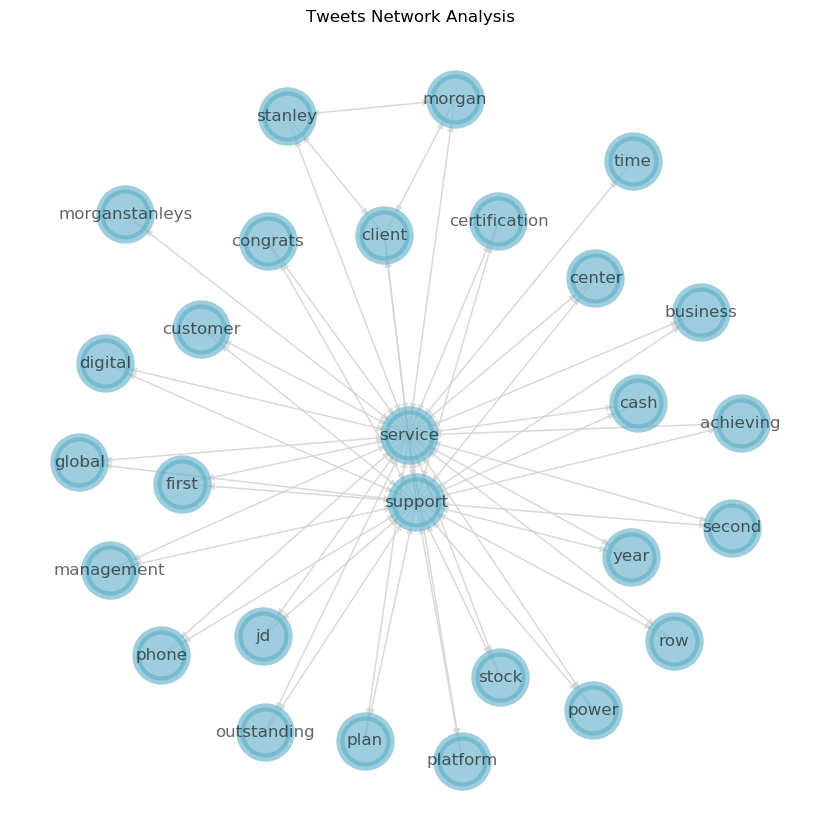

In [21]:
#choose the topics below, use all months now
topic_words = ['client', 'service']

#add stop words here according to the picture below and need to re-tokenized again!
DPt.addstopwords((['say', 'see', 'said', 'like', 'need']))  
DPt.tokenizetext()

tweet_result = show_tweets(DPt.data,   #should use tokenized data here (stopwords removed)
                           month_list = all_months, 
                           keywords = topic_words, 
                           count = 2,
                           threshold = 2, #choose only pos>threshold & neg<-threshold tweets
                           unique = False)  #must choose non-unique data, otherwise no network

all_tweets = [text for text, _, _, in tweet_result]
network_analysis(all_tweets, freq=10, color="#5daec7")

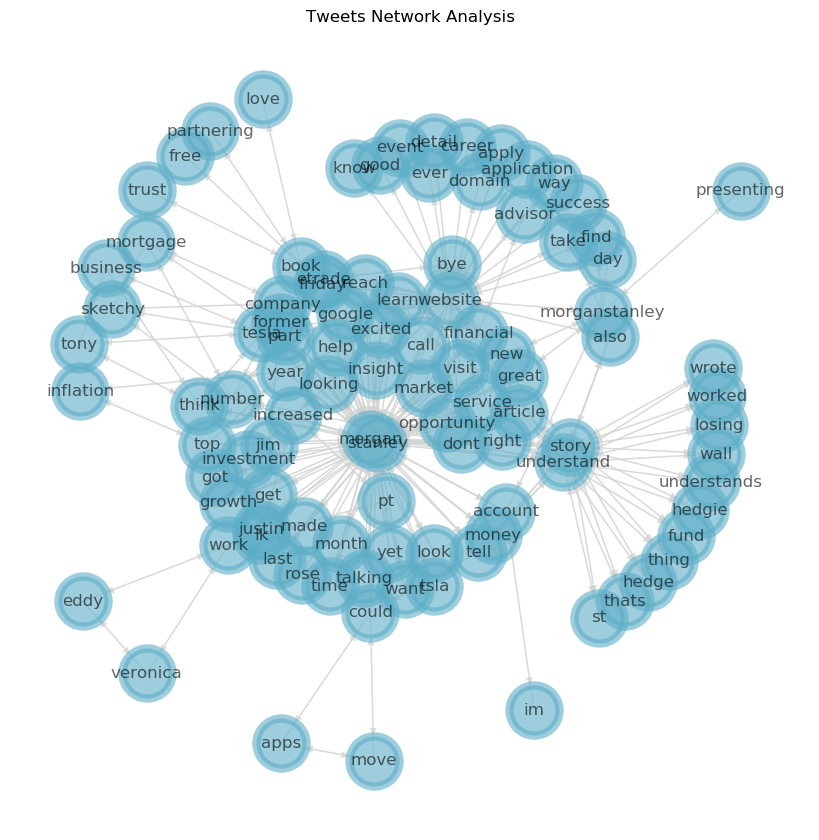

In [25]:
#DPt.addstopwords((['im','going','go']))  
#DPt.tokenizetext()

topic_words = ['app ', 'design', 'look', 'account', 'web', 'website']
tweet_result = show_tweets(DPt.data,   #should use tokenized data here (stopwords removed)
                           month_list = all_months, 
                           keywords = topic_words, 
                           count = 2,
                           threshold = 2, #choose only pos>threshold & neg<-threshold tweets
                           unique = False)  #must choose non-unique data, otherwise no network

all_tweets = [text for text, _, _, in tweet_result]
network_analysis(all_tweets, freq = 3, color = "#5daec7")